# [Chapter 6](https://github.com/Ziaeemehr/spikes/blob/main/docs/examples/chap_06.ipynb)

#### **Nonlinear neurodynamics and bifurcations**

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/spikes/blob/main/docs/examples/chap_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment and run this line to install the package on colab
# !pip install "git+https://github.com/Ziaeemehr/spikes.git" -q

In [1]:
import sympy
import sympy as sp
import numpy as np
import matplotlib as mpl
from scipy.linalg import eig
import matplotlib.pyplot as plt
from IPython.display import display, Math
from spikes.solver import solve_system_of_equations
import warnings
warnings.filterwarnings("ignore")

sympy.init_printing()

In [2]:

LABELSIZE = 13
plt.rc('axes', labelsize=LABELSIZE)
plt.rc('axes', titlesize=LABELSIZE)
plt.rc('figure', titlesize=LABELSIZE)
plt.rc('legend', fontsize=LABELSIZE)
plt.rc('xtick', labelsize=LABELSIZE)
plt.rc('ytick', labelsize=LABELSIZE)
mpl.rcParams['image.cmap'] = 'jet'

To plot the nullclines of a two-dimensional system of differential equations, you can use Python along with libraries like `NumPy`, `Matplotlib`, and `SymPy`. Here's a brief overview of how to do it:

#### Step 1: Define the System of Differential Equations

A two-dimensional system of differential equations can be written as:

$$
\begin{cases}
\frac{dx}{dt} = f(x, y) \\
\frac{dy}{dt} = g(x, y)
\end{cases}
$$

#### Step 2: Find the Nullclines

- **Nullcline for $ \frac{dx}{dt} = 0 $**: Set $ f(x, y) = 0 $.
- **Nullcline for $ \frac{dy}{dt} = 0 $**: Set $ g(x, y) = 0 $.

#### Step 3: Use SymPy to Solve for Nullclines

You can use `SymPy` to symbolically solve for $ y $ in terms of $x$ (or vice versa) where these equations are zero.

#### Step 4: Plot the Nullclines Using Matplotlib

After finding the expressions for the nullclines, you can use `Matplotlib` to plot them over a grid of values for $ x $ and $ y $.

#### Example

Consider the following system of differential equations:

$$
\begin{cases}
\frac{dx}{dt} = x^2 - y \\
\frac{dy}{dt} = y - x
\end{cases}
$$

#### Explanation

1. **Defining the system**: The functions $ f(x, y) $ and $ g(x, y) $ represent the right-hand side of the system of differential equations.

2. **Finding nullclines**: We solve $ f(x, y) = 0 $ and $ g(x, y) = 0 $ for $ y $.

3. **Plotting**: The nullclines are plotted using `Matplotlib`, with one set for $ \frac{dx}{dt} = 0 $ and another for $ \frac{dy}{dt} = 0 $.

#### Tools Used

- **SymPy**: For symbolic computation, solving the equations for nullclines.
- **NumPy**: For numerical operations and creating arrays of values.
- **Matplotlib**: For plotting the nullclines on a 2D plane.

This approach helps visualize where the system's derivatives are zero, giving insight into the system's behavior, such as identifying equilibrium points and possible phase portrait structures.

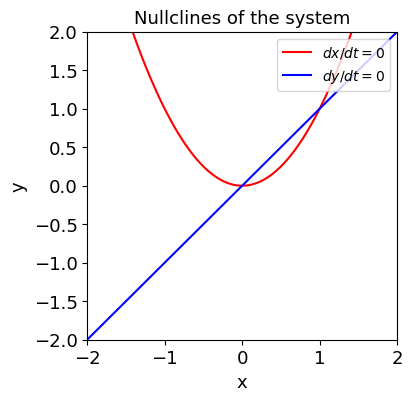

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint
from spikes.plot import plot_nullclines

# Example usage:
x, y = sp.symbols('x y')
f = x**2 - y
g = y - x

fig, ax = plt.subplots(figsize=(4,4))
plot_nullclines(f, g, symbols=['x', 'y'], ax=ax);

In [4]:
# adding direction fields
def fp(x, y):
    return x**2 - y

def gp(x, y):
    return y - x


def plot_vector_field(
    f, g, ax, 
    xrange=(-2, 2), 
    yrange=(-2, 2), 
    num_points=20,
    rotatexy=False):
    x = np.linspace(xrange[0], xrange[1], num_points)
    y = np.linspace(yrange[0], yrange[1], num_points)
    X, Y = np.meshgrid(x, y)

    u = f(X, Y)
    v = g(X, Y)

    norm = np.sqrt(u**2 + v**2)
    u_norm = u / norm
    v_norm = v / norm
    if rotatexy:
        ax.quiver(Y, X, v_norm, u_norm);
    else:
        ax.quiver(X, Y, u_norm, v_norm)

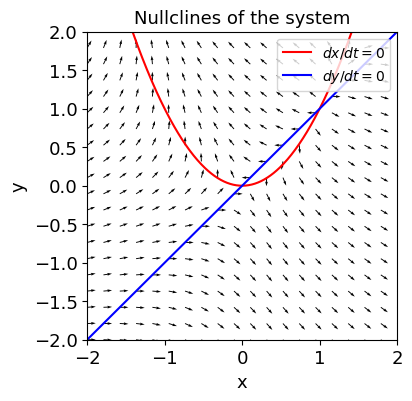

In [5]:
x, y = sp.symbols('x y')
f = x**2 - y
g = y - x

fig, ax = plt.subplots(figsize=(4,4))
plot_nullclines(f, g, symbols=['x', 'y'], ax=ax);
plot_vector_field(fp, gp, ax);

### adding an interactive trajectory solution
If you are getting messy output just comment the line @iteract()


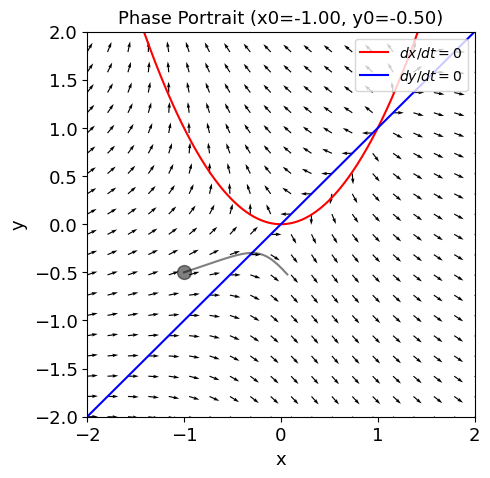

In [10]:
def ode(x, t):
    return np.array([fp(x[0], x[1]), gp(x[0], x[1])])

def plot_trajectory(x0=-1., y0=-.5, tspan=2):
    
    fig, ax = plt.subplots(figsize=(5, 5));
    plot_nullclines(f, g, symbols=['x', 'y'], ax=ax);
    plot_vector_field(fp, gp, ax)
    t_range = np.arange(0, tspan, 0.1)

    sol = odeint(ode, y0=np.array([x0,y0]), t=t_range)
    ax.plot(sol[:,0], sol[:, 1] , c='k', alpha=.5);
    ax.plot([x0], [y0], 'ko', ms=10, alpha=0.5);
    ax.set_title(f'Phase Portrait (x0={x0:.2f}, y0={y0:.2f})')
    # plt.show()

# comment the following line if you don't want to use interactive mode:
# interact(plot_trajectory, x0=(-1.99,1.99,.1), y0=(-1.99,1.99,.1), tspan=(1,5,0.5))

# uncomment the following for using without interactive mode
plot_trajectory()


Equation 6.3

$$
\begin{align*}
\frac{dA}{dt} &= \frac{1}{\tau_A}\big( -A + 2B \big) \\
\frac{dB}{dt} &= \frac{1}{\tau_B}\big( -B + \frac{L}{1+A} \big) \\
\end{align*}
$$

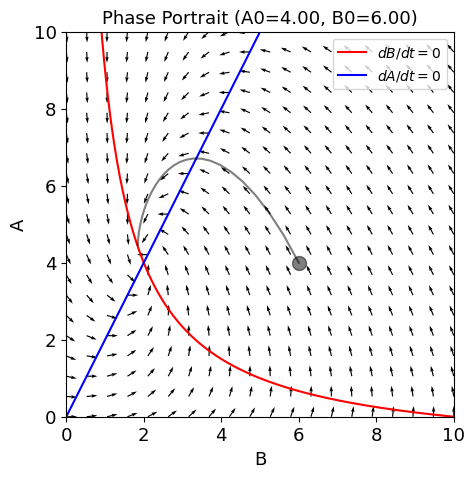

In [13]:
def fp(A, B):
    return -A + 2 * B

def gp(A, B):
    return -B + L / (A+1)

def ode(x, t):
    return np.array([fp(x[0], x[1]), gp(x[0], x[1])])

A, B = sp.symbols('A B')
L = 10
f = -A + 2 * B
g = -B + L / (A+1)

def plot_trajectory(A0=4, B0=6, tspan=3):
    
    fig, ax = plt.subplots(figsize=(5, 5));
    plot_nullclines(g, f, symbols=['B', 'A'], x_range=(0,10), y_range=(0,10), ax=ax);
    plot_vector_field(fp, gp, ax, xrange=(0,10), yrange=(0,10), rotatexy=True)
    t_range = np.arange(0, tspan, 0.1)
    
    sol = odeint(ode, y0=np.array([A0,B0]), t=t_range)
    ax.plot(sol[:,1], sol[:, 0] , c='k', alpha=.5);
    ax.plot([B0], [A0], 'ko', ms=10, alpha=0.5);
    ax.set_title(f'Phase Portrait (A0={A0:.2f}, B0={B0:.2f})')
    

# comment the following line if you don't want to use interactive mode:
# interact(plot_trajectory, A0=(0.1,9.99,.1), B0=(0.1,9.99,.1), tspan=(1,10,0.5))

# uncomment the following for using without interactive mode
plot_trajectory()


### Related tool
#### pplane
There is also a java/matlab tool available for visualization of the nullclines and vector fields [here](https://www.cs.unm.edu/~joel/dfield/).

#### Stabiliby of steady states

The process includes the calculation of the Jacobian matrix, finding the eigenvalues of the Jacobian matrix at the equilibrium point, and classifying the equilibrium point based on the nature of the eigenvalues.

We'll use the `sympy` library for symbolic differentiation (to compute the Jacobian) and `numpy` for numerical linear algebra (to find eigenvalues).

Here’s a step-by-step Python code that implements the process:

### Explanation:

1. **Step 1 (Equilibrium Points):** 
   - We define a system of equations $ \frac{dX}{dt} = F(X) $. 
   - The equilibrium points are found by solving $ F(X) = 0 $.

2. **Step 2 (Jacobian Matrix):**
   - The Jacobian matrix is calculated symbolically using `sympy.jacobian`.

3. **Step 3 (Eigenvalue Analysis and Classification):**
   - The Jacobian matrix at each equilibrium point is substituted into and evaluated numerically.
   - The eigenvalues are calculated using `numpy.linalg.eigvals`.
   - The type of equilibrium point is classified based on the eigenvalues:
     - **Node (Stable/Unstable):** All real and either positive (unstable) or negative (stable).
     - **Saddle Point:** Mixed signs among real eigenvalues.
     - **Spiral (Stable/Unstable):** Complex eigenvalues with negative or positive real parts.
     - **Center:** Purely imaginary eigenvalues (neutral stability).

### Customizing the Code:

1. **System of Equations:** Modify `F` for your system.
2. **Variables:** If your system has more variables, extend the variables `x1`, `x2`, etc.
3. **Jacobian Calculation:** The Jacobian calculation automatically scales with the number of variables in the system.

'Jacobian:'

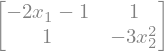

Equilibrium point (0, 0) is classified as: Saddle Point


In [9]:
import sympy as sp
import numpy as np
from IPython.display import display, Math
sp.init_printing()

def find_jacobian(F, X):
    """ 
    Compute the Jacobian matrix for a system of equations F(X). 
    
    Parameters
    ----------
    F: sympy.Matrix
        The system of equations represented as a sympy Matrix.
    X: sympy.Symbol or iterable of sympy.Symbol
        The independent variables of the system of equations.
    
    Returns
    -------
    J: sympy.Matrix
        The Jacobian matrix of the system of equations.
    
    """
    J = F.jacobian(X)
    return J

def equilibrium_points(F, X):
    """ 
    Solve for the equilibrium points by setting F(X) = 0. 
    
    Parameters
    ----------
    F: sympy.Matrix
        The system of equations represented as a sympy Matrix.
    X: sympy.Symbol or iterable of sympy
        The independent variables of the system of equations.
    
    Returns
    -------
    eq_points: sympy.Eq
        List of equilibrium points in the system.
    
    """
    eq_points = sp.solve(F, X)
    return eq_points

def classify_equilibrium(Jacobian, X_eq, X):
    """
    Classify the equilibrium point by calculating eigenvalues of the Jacobian at X_eq.
    
    Parameters
    ----------
    Jacobian: sympy.Matrix
        The Jacobian matrix of the system of equations.
    X_eq: sympy.Matrix
        The equilibrium point.
    X: sympy.Symbol or iterable of sympy
        The independent variables of the system of equations.
    
    Returns
    -------
    classification: str
        The classification of the equilibrium point.
    """
    # Substitute the equilibrium point into the Jacobian
    J_at_eq = Jacobian.subs([(x, x_eq) for x, x_eq in zip(X, X_eq)])
    # Evaluate symbolic Jacobian numerically
    J_at_eq = J_at_eq.evalf()  
    J_at_eq_np = np.array(J_at_eq).astype(np.float64)  # Convert to numpy array
    eigenvalues = np.linalg.eigvals(J_at_eq_np)  # Compute eigenvalues

    # Classify based on eigenvalues
    real_parts = [ev.real for ev in eigenvalues]
    imag_parts = [ev.imag for ev in eigenvalues]

    if all(np.isreal(eigenvalues)):  # If all eigenvalues are real
        if all(ev > 0 for ev in real_parts):
            return "Unstable Node"
        elif all(ev < 0 for ev in real_parts):
            return "Stable Node"
        else:
            return "Saddle Point"
    else:  # Complex eigenvalues
        if all(ev < 0 for ev in real_parts):
            return "Stable Spiral"
        elif all(ev > 0 for ev in real_parts):
            return "Unstable Spiral"
        else:
            return "Center (Neutral Stability)"
        

# Define the variables (states)
x1, x2 = sp.symbols('x1 x2')
X = sp.Matrix([x1, x2])

# Define the system of equations (nonlinear system)
F1 = -x1 + x2 - x1**2
F2 = x1 - x2**3
F = sp.Matrix([F1, F2])

# Step 1: Find equilibrium points
eq_points = equilibrium_points(F, X)

# Step 2: Calculate the Jacobian matrix
Jacobian = find_jacobian(F, X)
display("Jacobian:", Jacobian)

# Step 3: Classify each equilibrium point
for X_eq in eq_points:
    # display(Math(f'x_{"{eq}"} = {sp.latex(X_eq)}'))
    classification = classify_equilibrium(Jacobian, X_eq, X)
    print(f"Equilibrium point {X_eq} is classified as: {classification}")


'Equilibrium point:'

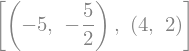

'Jacobian:'

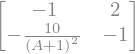

Equilibrium point (-5, -5/2) is classified as: Stable Spiral
Equilibrium point (4, 2) is classified as: Stable Spiral


In [10]:
A, B = sp.symbols('A B')

L = 10
f = -A + 2 * B
g = -B + L / (A+1)
F = sp.Matrix([f, g])
X = sp.Matrix([A, B])

eq_points = equilibrium_points(F, X)
display("Equilibrium point:", eq_points)
Jacobian = find_jacobian(F, X)

display("Jacobian:", Jacobian)
for X_eq in eq_points:
    classification = classify_equilibrium(Jacobian, X_eq, X)
    print(f"Equilibrium point {X_eq} is classified as: {classification}")
